# AM50 Homework 0

**Name:**

**Email:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=False)
rc("font", family = "serif")
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'

## Problem 1

**Part a.** Give an example of a network model that could be used to describe something you are interested in. What do the nodes represent? What do the edges represent? Is the graph directed or undirected?

**Part b.** Sketch a few nodes (at least 5) of this graph and label them. Draw edges which are a part of the network. Is this subgraph connected? ( If you are feeling fancy you could look into using [daft](http://daft-pgm.org) to render the graph in python. Type `pip install daft` at the command line to install daft)

**Part c.** Is there a meaning to a walk through this graph?

## Problem 2: Movie Stars

Run the code below to load in a actor co-starring dataset. 


In [120]:
#This cells code and all the data comes from https://www.kaggle.com/s7uff3r/network-mapping-hollywood-actor-overlap/data
import pandas as pd
import json
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

In [3]:
movie_data = load_tmdb_credits("tmdb_5000_credits.csv")

In [62]:
"""
This is somewhat confusing because both the movies and actors in the dataset are referenced by arbitrary id numbers.
Here we create new dictionaries -- the lookups -- that reindex the actors and the movies by numbers from 0 to N-1.
We only look at the first 5 listed actors from each movie
"""
max_actors = 5
actor_converter = {} #given actor id -> new id
movie_lookup = {}#new id -> Title
movie_actors = {}# new movie id -> new actor ids
actor_lookup = {} #new id -> name
actor_count = 0
for i,movie in movie_data.iterrows():
    movie_lookup[i] = movie['title']
    movie_actors[i] = []
    for actor in movie['cast']:
        if actor['order']<max_actors:
            aid = actor['id']
            if aid not in actor_converter:
                actor_converter[aid] = actor_count
                actor_count += 1
            movie_actors[i].append(actor_converter[aid])
            actor_lookup[actor_converter[aid]] = actor['name']

N_actors = len(actor_lookup)
N_movies = len(movie_lookup)
print(N_actors)

9186


The above code is a little complicated but the end result is three *dictionaries* that contain all the important information for the problem at hand. 

`movie_lookup` will tell you the name of a given movie, we will refer to all the movies by an id number that originates from the dataset we collected

`actor_lookup` is the same deal except it returns an actors name given an actor's id number. These will just be nice to look at predictions of the model.

***This is the most important part***

`movie_actors`  This is a dictionary that given a movie id number, returns a list of 10 actor id numbers corresponding to the first 10 actors who appear in the credits of that movie. 

A few examples of querying these dictionaries are given below:

In [56]:
print (movie_lookup[214])
print (actor_lookup[8784])
print (movie_actors[214])
#To get an idea of why these dictionaries are nice
print (f"Movie Title: {movie_lookup[500]}")
print("Starring: ")
for actor in movie_actors[500]:
    print(actor_lookup[actor])

The Perfect Storm
Daniel Sharman
[522, 229, 76, 535, 97, 1049, 335, 1050]
Movie Title: 2 Fast 2 Furious
Starring: 
Paul Walker
Tyrese Gibson
Eva Mendes
Cole Hauser
Ludacris
James Remar
Devon Aoki
Thom Barry


### Part a. ###

Now to the actual problem! Use the `movie_actors` dictionary to create the adjacency matrix for this network. Recall that for this case. the $(i,j)$ element of the adjacency matrix $A$ will contain the number 1 if actors $i$ and $j$ have appeared together in a movie. 

The actors are all indexed by a number in between 0 and `N_actors-1`.

In [122]:
Adj = np.zeros((N_actors, N_actors))
for movie in range(N_movies):
    for i,actor in enumerate(movie_actors[movie]):
        for j,costar in enumerate(movie_actors[movie][i+1:]):
            #Fill in the elements of the adjacency matrix here
            pass #Delete this when you fill in the matrix
            

In [72]:
#plt.spy(Adj) #Show all the nonzero elements of a matrix aka the sparsity 
#plt.show()

### Part b.

Calculate the path lengths between each pair of actors using the adjacency matrix. Compute the mean and median path lengths You might start by considering a small graph like the one shown below and seeing what differnt powers of its adjacency matrix tell you about the graph. 

<img src="https://github.com/Hekstra-Lab/AM50-Student-2019/blob/master/images/simple_graph.png?raw=true" , width=200, height=200>

In [107]:
# Hints -- Useful commands
print (2**3)
test_mat = np.array([[1,2],[3,4]])
print(test_mat**2)
print(test_mat@test_mat)#use @ for matrix multiplication
# what is the difference between mat@mat and mat**2?

print(np.linalg.matrix_power(test_mat,2))
print((test_mat>2).astype(np.float)) #remember that you can apply math operations to whole arrays without looping

8
[[ 1  4]
 [ 9 16]]
[[ 7 10]
 [15 22]]
[[ 7 10]
 [15 22]]
[[0. 0.]
 [1. 1.]]


In [102]:
small_adj = np.zeros((4,4))
#Fill in the elements manually'

In [103]:
# #Use plt.imshow to visualize the powers of this matrix.
# plt.imshow(small_adj)
# plt.colorbar()
# plt.show()

In [108]:
separation_matrix = -1*np.ones([N_actors, N_actors]) 
max_path_length = 10
#the i,j element should be the minimum path length between actors i and j
#if the i,j element is -1 it means they are not connected after max_path_length steps
for i in range(max_path_length):
    #Code to compute path lengths between nodes
    pass

### Part c.

Compute the degree distribution for this network by making a histogram of the number of edges connected to each node. What is the average degree for this graph? Hint: How do you get the number of edges that a single node has from the adjacency matrix? Another hint: consult the Strogatz and Watts paper.

In [109]:
N_edges = np.zeros(N_actors)
for n in range(N_actors): 
    pass #Your code here
#Useful challenge: it is possible to do this without looping by using np.sum() -- do it that way
print(clustering_coeff)

In [110]:
# #Make a histogram 
# bins = np.arange(12)-0.5
# plt.hist(N_edges,range=[0,12],bins=bins)
# plt.show()

### Part d.

Compute the average clustering coefficient for this graph. Recall that for a given node in the graph, the clustering coefficient is the number of edges present among all of its neighbors as a fraction of the maximum possible number of such edges. 

In [117]:
# Hint - smart indexing of numpy arrays
my_array = np.arange(36).reshape(6,6)
print(my_array)
print( my_array[ my_array%4 == 0] )
rows = np.array([0,2,4])
cols = np.array([1,3,5])
print(my_array[rows,cols])
# For more see https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html
# Or https://docs.scipy.org/doc/numpy-1.15.0/user/basics.indexing.html

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
[ 0  4  8 12 16 20 24 28 32]
[ 1 15 29]


In [119]:
clustering_coefs = np.zeros(N_actors)
for n in range(N_actors):
    #compute the submatrix of Adj containing all neighbors of actor n
    #compute the number of edges in this subgraph
    #compute the maximum possible number of esges
    #compute the clustering coefficient
    pass
#avg_clustering_coef = 0

# Problem 3 - Simulating the life of Hollywood actors
It seems that movie directors sure like to go through the same list of actors all the time, with unknown actors not getting a shot nearly as much as you’d expect by chance. A concept in network analysis, _preferential attachment_, has been proposed to capture this notion in order to explain some features of small-world networks. In this problem we will explore different models for the probability of two actors costaring in a new movie and simulate the co-network based on these probability models. We have written the code that performs the simulations so all you need to provide the probability model $p_m(v)$ of actor $v$ being cast in movie $m$. 

To be explicit, the network we are considering will have nodes of actors with an edge between them if they have ever costarred in a movie. The adjacency matrix will describe this network, and at the beginning there will be no edges in the graph. We will then start to cast 10 actors to a movies one at a time, only updating the adjacency matrix after a movie is finished, with the movies also being cast one after the other. This will allow us to base the probability of an actor being cast into a movie on who has already been cast for that movie and the adjacency matrix. We can write this as:
\begin{equation}
p_m(v|\text{current cast}, \text{adjacency matrix}) = ....
\end{equation}
which you read out loud as: the probability of actor $v$ being cast in movie $m$ conditioned on the current cast and adjacency matrix. 


### Part a.
We will assume that the probability that actor $v$ will get cast in movie $m$ is determined by two terms: a small probability to get picked at random, and a term proportional to how many other movies you have starred in ($n(v)$). That is, the probability : $p_m(v) \propto n_0 + n(v)$. We will look at what the co-starring network looks like after $N_{movies} = 300$ movies, each casting 10 actors out of $N_{actors}=1000$ total.

**Implement this function in python, being sure to normalize the probability distribution at the end.**


Hint 1: We wrote an example python function returning probabilities for a silly model. Spend some time looking at it before you start.  
Hint 2: The degree of each actor can be found by summing each row (squishing horizontally). Here is an example:
$$M=\begin{bmatrix}
    0       & 1 &2 \\
    1      & 0 & 1 \\
    1      & 0 & 0
\end{bmatrix}
$$
$$M\text{.sum}(axis=1)=\begin{bmatrix}
    3   \\
    2      \\
    1      
\end{bmatrix}
$$



#### Example function returning probabilties

Here I wrote an example python function. This function implements the 
\begin{equation}
p_m(v) \propto \displaystyle\sum_{j\text{ } s.t. A_{ij}\neq 0} \sin^2(j)
\end{equation}

where $A_{ij}$ refers to the i,jth element of the adjacency matrix and $s.t.=$such that. This function isn't actually justifiable as the actor indices are arbitary, but it does have the key feature of not directly giving away one of the answers to the below problems.

In [ ]:
def example_get_actor_probs(current_movie_cast, adjacency_matrix):
    """
    
    This is a docstring, text that describes the function. We write docstrings that are inspired
    by the numpy convention (https://numpydoc.readthedocs.io/en/latest/format.html) we recommend you do this as
    well
    
    inputs
    ------
    current_movie_cast : list 
        list the actors already cast into the movie being casted for. Be careful, this 
        can have length anywhere from 0 to 10.
    
    adjacency_matrix    : np.array
        current adjaceny matrix 
    
    scenario : int
        Integer describing 
    
    returns 
    -------
    array  
        probability of every actor to be cast in the current movie. the ith element should
        be a normalized probability of the ith actor being cast in this movie. If an actor is already
        in the movie they should have probabilty 0 so they aren't cast twice!
    """
    
    N = adjacency_matrix.shape[0] #get number of actors
    if len(cur_cast)==0:
        # if no one has been cast yet set random probabilities
        p = np.random.rand(N)
    else:
        #if at least one person has already been cast we can use that
        # to inform our next choices
        #
        # In this example we'll use the somewhat 
        # ridiculous function sin^2(id number of the actors we are connected to)
        p = np.zeros(N) # init with zero prob
        p += .000001 #for numerical stability
        for i in range(N):
            for j in range(N):
                if i == j:
                    # skip if i=j
                    # see https://docs.python.org/3/tutorial/controlflow.html#break-and-continue-statements-and-else-clauses-on-loops
                    continue
                if adjacency_matrix[i,j]>1:
                    p[i] = p[i] + np.sin(j)**2
        # To make sure that we don't cast the same person twice set 
        # the probabilty of anyone already in the movie to 0
        # You can use the below line in all the functions you write
        # to understand it read about numpy indexing
        # https://www.tutorialspoint.com/numpy/numpy_indexing_and_slicing.htm
        p[current_movie_cast]=0
    p = p/p.sum() # normalize the distribution
    return p

#### Defining the simulation code

In [44]:
def simulate_casting(get_actor_probs,n_actors = 1000, actors_per_movie = 10,n_movies=300):
    """
    function that performs the simulation of casting actors to movies. You need to provide a function that 
    takes in a current cast list and adjacency matrix and returns a probability for every actor that they will
    be cast as well
    
    example usage
    -------------
    def probability_model_1(current_movie_cast, adjacency_matrix):
        .....
    
    adj_matrix_1, co_star_1 = simulate_casting(probability_model_1)
    # do analysis with adjacency matrix
    
    inputs
    ------
    get_actor_probs : function
        Function that takes arguments: current_movie_cast, adjacency_matrix
    
    n_actors : integer
        number of actors to simulate
    
    actors_per_movie : integer
        number of actors cast to each movie. Must be > n_actors
        
    n_movies : integer
        number of movies to simulate casting for
        
    
    returns
    -------
    adjacency matrix : array
        the adjacency matrix as defined in class for the simulated co-star network
    co star counts : array
        Same as the adjaceny matrix but with edges weighted by the number of times those actors costarred
    """

    id_list = np.arange(n_actors)
    co_star_counts = np.zeros([n_actors,n_actors])
    adjacency_matrix = np.zeros_like(co_star_counts)

    for m in range(n_movies):
        cur_cast = []
        while len(cur_cast)<10:
            probs = get_actor_probs(cur_cast,adjacency_matrix)
            next_actor = np.random.choice(a = id_list,p = probs)
            cur_cast.append(next_actor)
        # update the adjacency and costar matrices
        # note that the the adjacency matrix is not updated during the casting 
        for i,v in enumerate(cur_cast):
            for j in cur_cast[i+1:]:
                co_star_counts[v,j] += 1
                co_star_counts[j,v] += 1
                adjacency_matrix[v,j] = 1
                adjacency_matrix[j,v] = 1    
    return adjacency_matrix, co_star_counts

## Code for part a here

In [191]:
def get_actor_probs_a(current_movie_cast, adjacency_matrix):
    N = adjacency_matrix.shape[0]
    return np.ones(N)/N


### Part b 
Now come up with a probability that depends on the number of actors previously costarred with who are already in cast in the movie. Write out this function in Latex(or by hand with a picture) and justify the mathematical form in one to two sentences. Then implement this in python as ```get_actor_probs_b```

Hint 1: The list of who has already been cast is ```current_movie_cast``` in the example function  
Hint 2: If you get an error: ```ValueError: Fewer non-zero entries in p than size``` when you run the simulation code that means in some cases your function has no nonzero entries in the probability list. You can often fix this by adding a very small number conventionally written as $\epsilon \approx .00001$ to the probabilities. The idea being that in non-pathological cases this won't effect the answer but it will save you if things start to break down.

In [199]:
def get_actor_probs_b(current_movie_cast, adjacency_matrix):
    N = adjacency_matrix.shape[0]
    return np.ones(N)/N


### Part c
Write down a probabilty model that where the probability of selection is random for each round of casting. Then implement this in python as ```get_actor_probs_c```



In [200]:
def get_actor_probs_c(current_movie_cast, adjacency_matrix):
    N = adjacency_matrix.shape[0]
    return np.ones(N)/N

### Part d

Come up with your own probability model. Write out this function in Latex(or by hand with a picture) and justify the mathematical form in one to two sentences. Then implement this in python as ```get_actor_probs_d```

In [201]:
def get_actor_probs_d(current_movie_cast, adjacency_matrix):
    N = adjacency_matrix.shape[0]
    return np.ones(N)/N


## Part e - Analysis
Below is code that plots the adjacency matrices for each of the models. Use these plots to answer the following questions


- Several of these distributions should be composed of the many sharp peaks with very few counts between them. Why is this occuring?
    - Hint: consider if these peaks occur at multiples of some number
- Considering the degree distribution for part c, why does using n_movies=2000 change this peakiness 
    - adj_mat_c, costar_c = simulate_casting(get_actor_probs_c,n_movies=2000)


- Which of these degrees distributions imply the presence of very import hubs in the networks.

A fun extension of this problem (to be clear, not required for this homework) you can try is to identify hubs and see how that affects the distribution of path lengths. Is are there ever sudden changes in the path length distribution when you remove certain actors?.

In [202]:
adj_mat_a, costar_a = simulate_casting(get_actor_probs_a)
adj_mat_b, costar_b = simulate_casting(get_actor_probs_b)
adj_mat_c, costar_c = simulate_casting(get_actor_probs_c)
adj_mat_d, costar_d = simulate_casting(get_actor_probs_d)

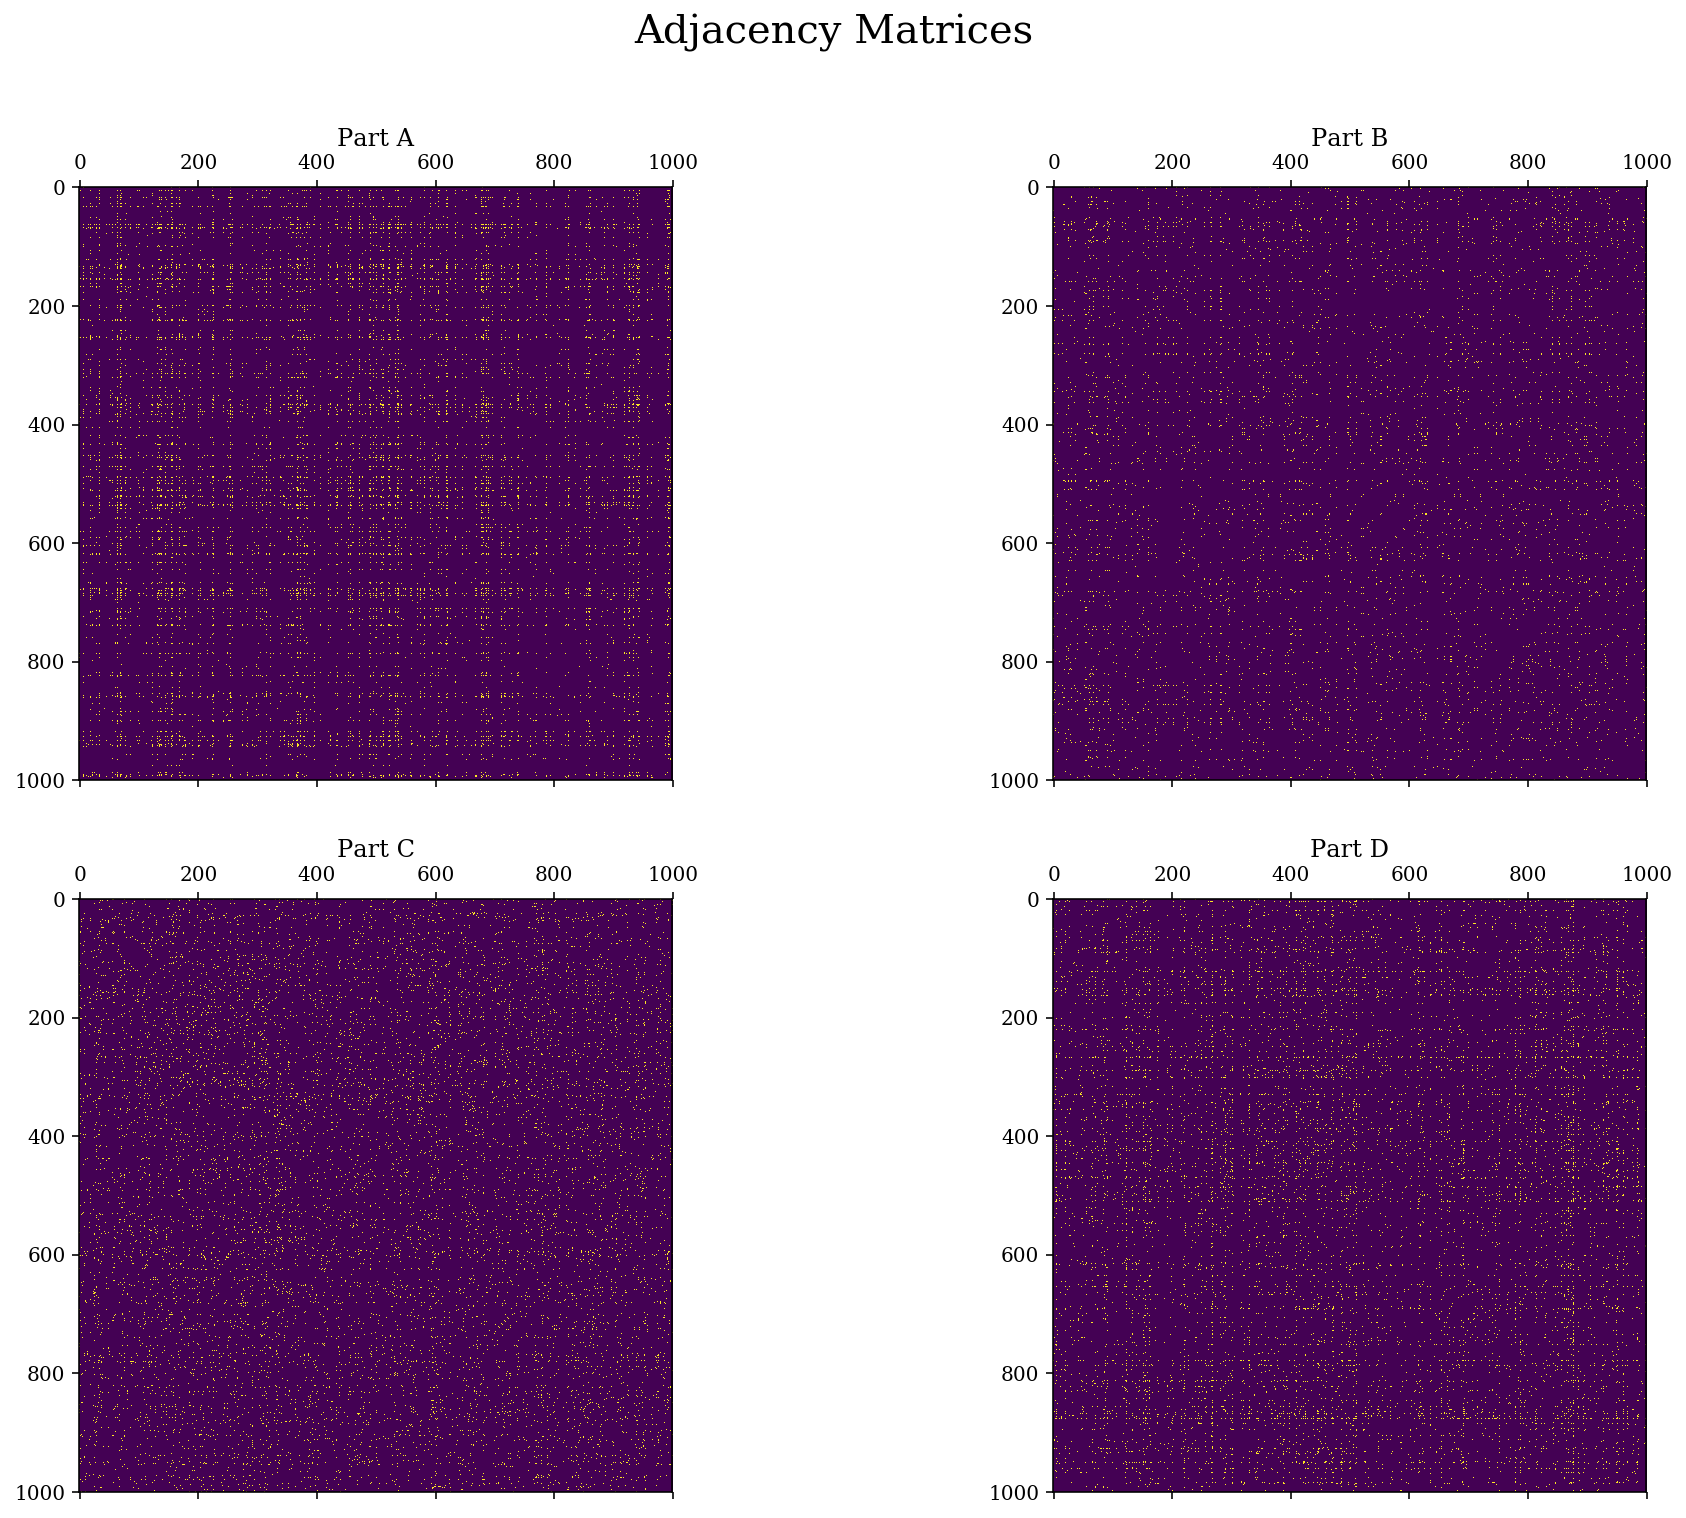

In [204]:
# This plotting code is based on code from this matplotlib example: https://matplotlib.org/examples/pylab_examples/subplots_demo.html
f, axarr = plt.subplots(2, 2,figsize=(16,12))
f.suptitle('Adjacency Matrices',fontsize=20)
axarr[0, 0].set_title('Part A')
axarr[0, 0].matshow(adj_mat_a)

axarr[0, 1].set_title('Part B')
axarr[0, 1].matshow(adj_mat_b)

axarr[1, 0].set_title('Part C')
axarr[1, 0].matshow(adj_mat_c)

axarr[1, 1].set_title('Part D')
axarr[1, 1].matshow(adj_mat_d)
plt.show()

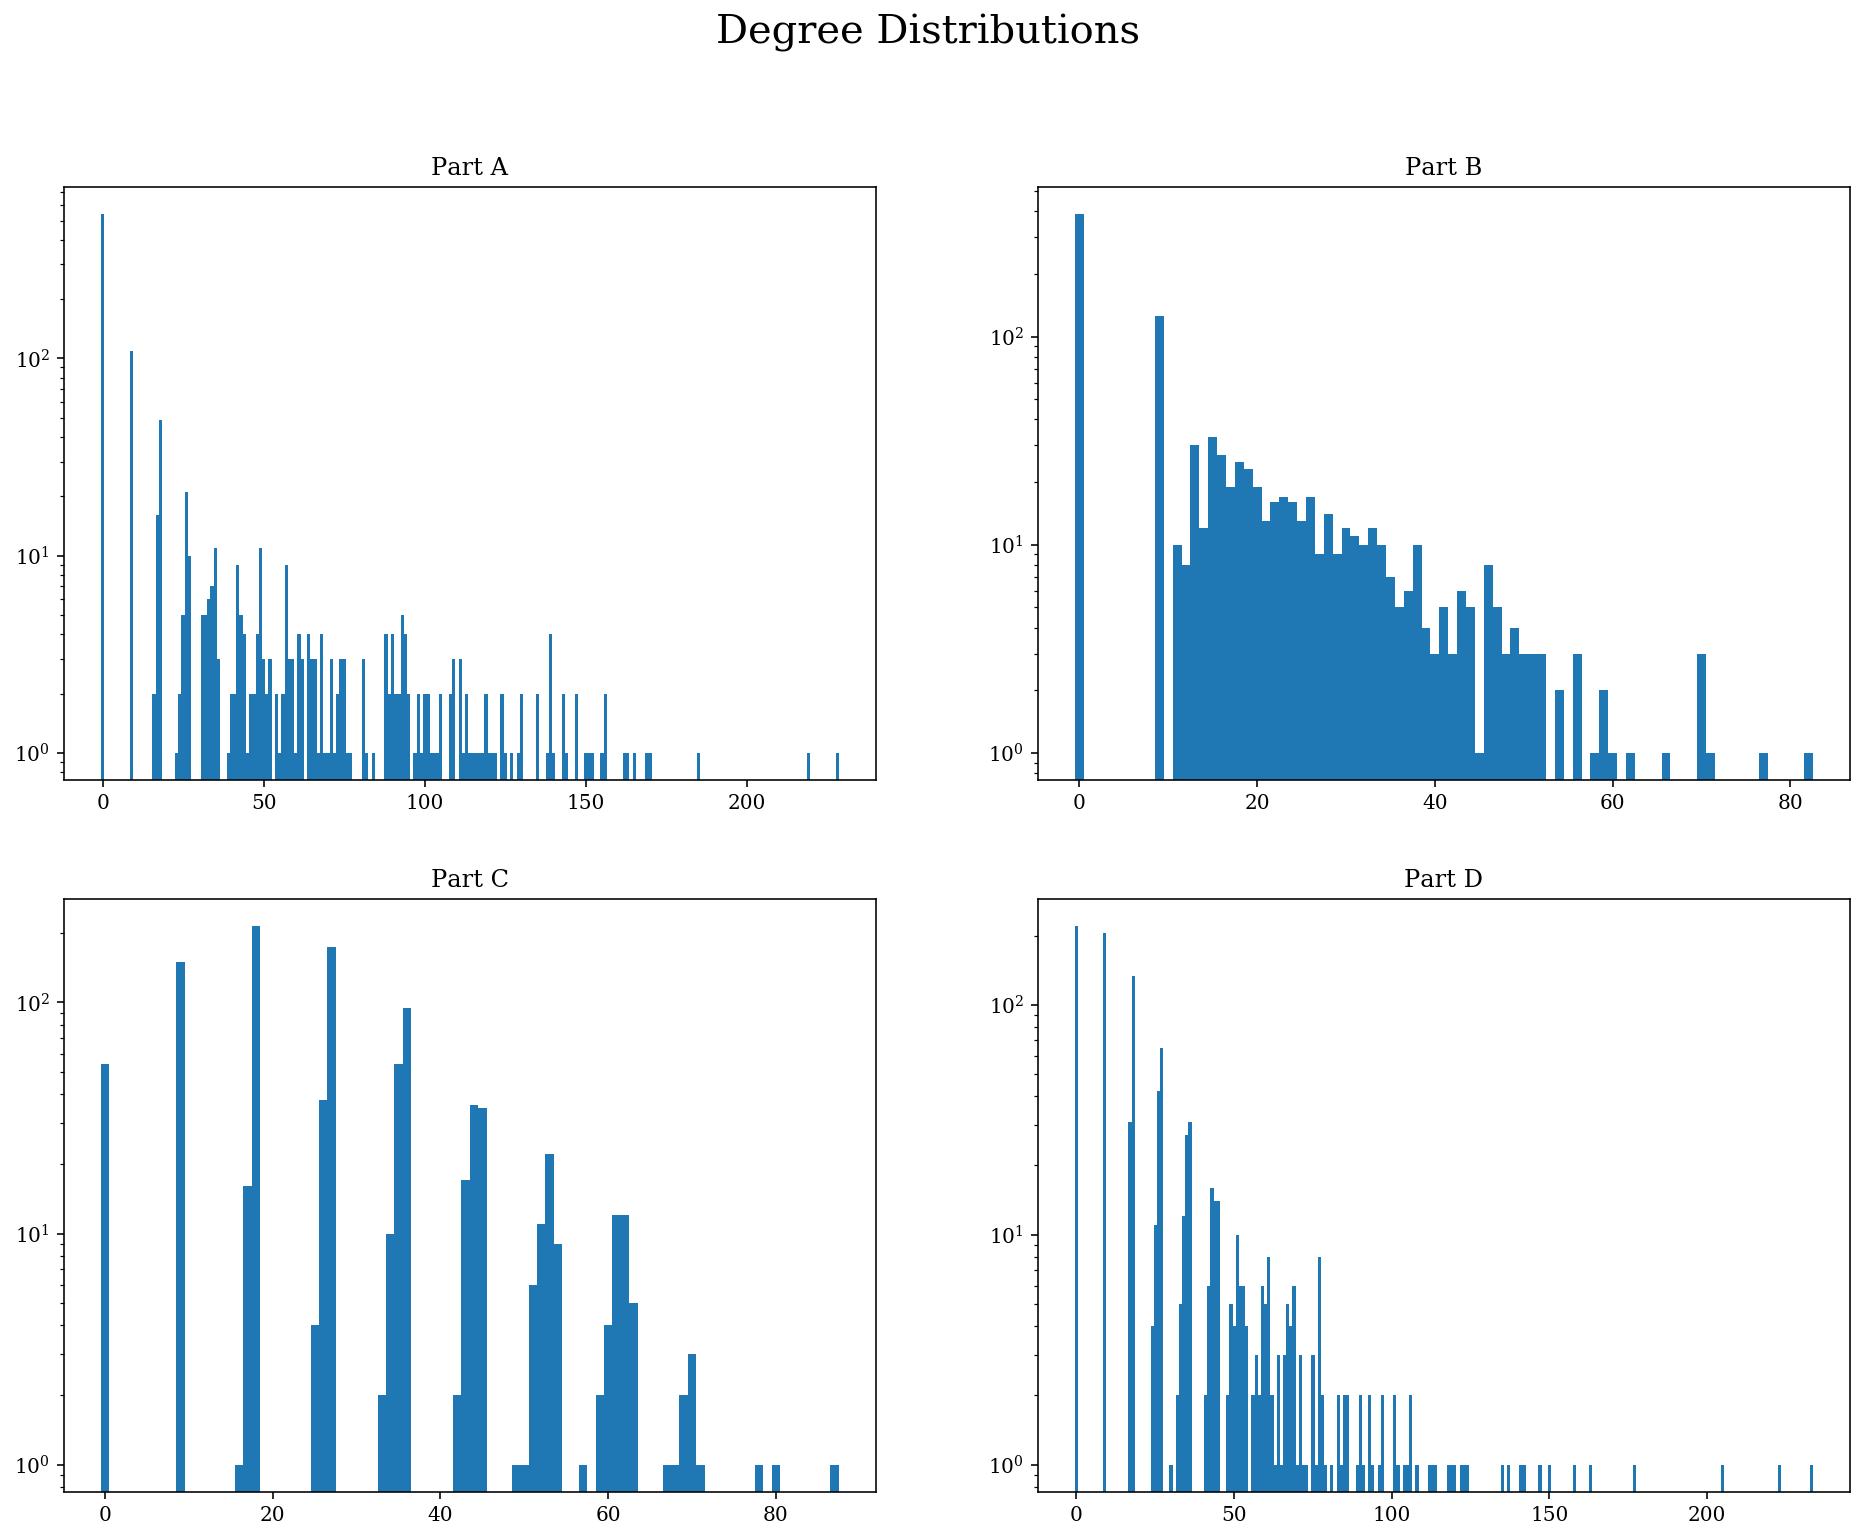

In [210]:
degrees_a = adj_mat_a.sum(axis=1)
degrees_b = adj_mat_b.sum(axis=1)
degrees_c = adj_mat_c.sum(axis=1)
degrees_d = adj_mat_d.sum(axis=1)

f, axarr = plt.subplots(2, 2,figsize=(16,12))
f.suptitle('Degree Distributions',fontsize=20)


axarr[0, 0].set_title('Part A')
axarr[0, 0].hist(degrees_a,bins =-0.5+np.arange(degrees_a.max()+2))
axarr[0, 0].set_yscale('log')

axarr[0, 1].set_title('Part B')
axarr[0, 1].hist(degrees_b,bins =-0.5+np.arange(degrees_b.max()+2))
axarr[0, 1].set_yscale('log')


axarr[1, 0].set_title('Part C')
axarr[1, 0].hist(degrees_c,bins =-0.5+np.arange(degrees_c.max()+2))
axarr[1,0].set_yscale('log')

axarr[1, 1].set_title('Part D')
axarr[1, 1].hist(degrees_d,bins =-0.5+np.arange(degrees_d.max()+2))
# axarr[1, 1].set_xscale('log')
axarr[1, 1].set_yscale('log')
plt.show()